In [186]:
import pandas as pd
import numpy as np

df = pd.read_csv("iris_dataset.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# df=df.loc[:,(df.columns == "sepal length (cm)") | (df.columns == "sepal width (cm)")]
df=df.loc[:,df.columns.isin(["sepal length (cm)", "sepal width (cm)","target"])]
index_of_test = 149
test = df.loc[index_of_test,:]
df.loc[index_of_test,"target"] = "test" #2
train_df = df.drop(index_of_test)
df

C:\Users\ali\AppData\Local\Temp\ipykernel_1844\4105402052.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'test' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index_of_test,"target"] = "test" #2


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


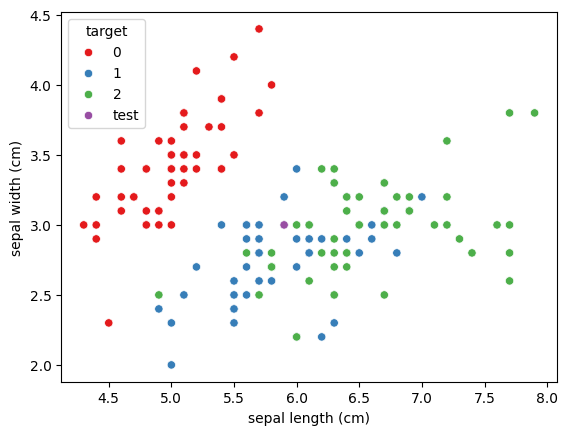

In [188]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.scatterplot(df,x="sepal length (cm)",y="sepal width (cm)",hue="target",palette="Set1")
plt.show()

In [189]:
import numpy as np

def euq(a,b):
    distsqr = 0
    for i in range(len(a)):
        distsqr += (a[i] - b[i])**2
    return np.sqrt(distsqr)

train_df["distance"] = euq([test["sepal length (cm)"],test["sepal width (cm)"]],[train_df["sepal length (cm)"],train_df["sepal width (cm)"]])
train_df

,sepal length (cm),sepal width (cm),target,distance
0,5.1,3.5,0,0.943398
1,4.9,3.0,0,1.000000
2,4.7,3.2,0,1.216553
3,4.6,3.1,0,1.303840
4,5.0,3.6,0,1.081665
...,...,...,...,...
144,6.7,3.3,2,0.854400
145,6.7,3.0,2,0.800000
146,6.3,2.5,2,0.640312
147,6.5,3.0,2,0.600000


In [190]:
topone = train_df[train_df.distance == train_df.distance.min()]
topone

,sepal length (cm),sepal width (cm),target,distance
61,5.9,3.0,1,0.0


In [191]:
print(f"the nearest sample is in class target {topone.target.values} and the correct target is {test.target}")

the nearest sample is in class target [1] and the correct target is 2.0


In [ ]:
topthree = train_df[train_df.distance.isin(train_df.distance.nsmallest(3))]
topthree

,sepal length (cm),sepal width (cm),target,distance
61,5.9,3.0,1,0.000000
78,6.0,2.9,1,0.141421
138,6.0,3.0,2,0.100000


In [193]:
print(f"the most repeated class in 3 nearest samples is target {topthree.target.mode().values} and the correct target is {test.target}")

the most repeated class in 3 nearest samples is target [1] and the correct target is 2.0
